<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-2/blob/main/Assignment/1202-Deep%20Learning-TensorFlow-06~07-Functional%20API%2C%20Model%20Subclassing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **06. 모델 저장 및 불러오기**

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11490434/11490434 [==============================] - 1s 0us/step


In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    tf.keras.layers.Dense(10, activation='softmax'), 
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2306 - accuracy: 0.9320 - val_loss: 0.1287 - val_accuracy: 0.9594
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0945 - accuracy: 0.9709 - val_loss: 0.0961 - val_accuracy: 0.9714
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0679 - accuracy: 0.9784 - val_loss: 0.0814 - val_accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0507 - accuracy: 0.9840 - val_loss: 0.0830 - val_accuracy: 0.9745
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.0696 - val_accuracy: 0.9805
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0836 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0280 - accuracy: 0.9904 - val_loss: 0.0948 - val_acc

### 6-1 모델을 파일로 저장
- 훈련을 종료하여 가중치가 업데이트된 모델 인스턴스를 저장할 수 있음
- save() 메소드를 호출할 때 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정
    - 모델을 저장하는 형식: HDF5 포맷, SavedModel 포맷
        - 모델을 저장할 파일명이 .h5 확장자를 포함하는 경우는 모델이 HDF5 포맷으로 저장
        - HDF5 파일 형식은 대용량의 데이터를 저장하기 위한 파일 형식


In [3]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

### 6-2 저장된 모델 복원
- tensorflow.kerase.models.load_model() 메소드로 저장된 모델을 복원할 수 있음

In [4]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


- 복원한 모델을 검증하여 복원이 잘 되었는지 확인
    - 검증 셋을 evaluate 함수에 대입해, 손실 함수와 평가지표 계산

In [5]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.08615, acc: 0.97910


- .h5 확장자를 생략하면 SavedModel 포맷으로 저장되며 텐서플로2에서 기본으로 지원하는 파일 포맷임
- SavedModel 포맷으로 저장된 모델을 복원할 때 HDF5와 같은 방식으로 복원하면 됨

In [6]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

In [7]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 검증 (HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증 (SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.08615, acc: 0.97910
saved_model] loss: 0.08615, acc: 0.97910


- &rarr; SavedModel 형식으로 저장 및 복원된 모델의 성능을 확인하면, HDF5 형식으로 저장 및 복원된 모델과 동일한 성능을 나타냄

## **07. 복잡한 모델 생성**



### 7-1 함수형 API(Functional API)
- 함수 형태로 딥러닝 모델을 정의하면 다양한 모델 구조를 구현할 수 있음
- 여러 층을 시퀀스 형태 로 연결하는 Sequential API와 다르게, Functional API는 복잡한 구조의 모델을 정의 가능함

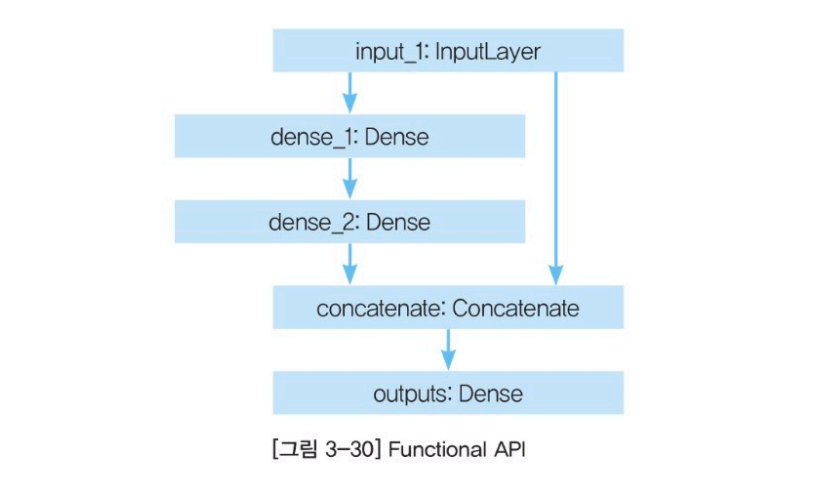
- 그림과 같이 함수의 입력 매개변수를 여러 개 갖는 다중 입력, 함수의 return 값을 여러 개 갖는 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조도 가능함

*Sequential API로 구현한 minist 분류기 모델을 함수형 API로 동일하게 구현하는 예제*

In [9]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

- 함수형 API를 사용하기 위해서는 먼저 Input 레이어를 정의함
    - Input 레이어에 데이터의 입력 shape를 정의
- 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결함
- 레이어마다 name 매개변수로 이름을 부여할 수 있음
    - 모델 인스턴스에 대하여 summary()로 요약 출력할 때 이름이 함께 출력됨

In [10]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

- 체인 방식으로 연결한 후에 tf.keras.Model()에 입력 레이어와 출력 레이어를 정의해 모델을 생성
- 모델 인스턴스 생성 시 name 매개변수에 이름을 지정하면 해당 이름이 summary()에 출력됨

In [11]:
# 모델 생성
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary()

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


- 복잡한 구조를 갖는 모델을 생성할 때는 summary()로 모델의 구조도를 시각화하기 어려움
- 케라스의 유틸 패키지에서 제공하는 plot_model 모듈을 활용하여 모델의 구조도 시각화
- plot_model()에 모델을 지정하면 구조도 출력
    - show_shapes=True: 데이터의 입출력 shape 출력
    - show_layers_names: 레이어의 이름 출력
    - to_file='파일명': 이미지 파일로 저장 가능

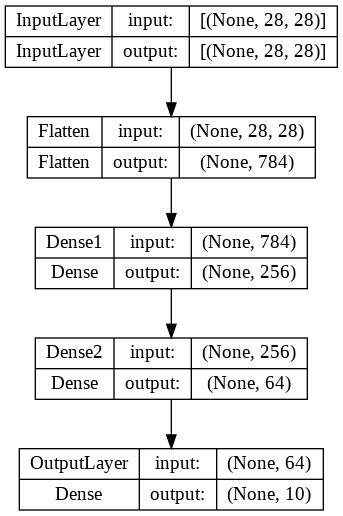

In [12]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

- 함수형 API로 생성한 모델도 Sequential API로 생성한 모델과 동일한 방식으로 훈련할 수 있음

In [13]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2108 - accuracy: 0.9376
Epoch 2/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0865 - accuracy: 0.9734
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0606 - accuracy: 0.9811
Functional Model] loss: 0.06477, acc: 0.97960


### 7-2 모델 서브클래싱(Model Subclassing)
- 텐서플로 케라스는 Model 클래스를 제공하고, 이를 기반으로 딥러닝 모델을 구현하고 있음
- 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델을 만들 수도 있음
- 함수형 API로 생성한 모델과의 성능 차이는 없음

- Model Subclassing으로 모델 인스턴스 생성하기 위해서는 tf.keras.Model을 상속받아 생성하고자 하는 모델 클래스 구현
    - 모델의 `__init__()` 함수에 레이어를 정의하고 레이어의 하이퍼파라미터를 정의
    - call 함수를 메소드 오버라이딩으로 구현
        - fit() 메소드가 호출되어 훈련하는 경우 호출될 함수
        - 함수 내부에서는 모델의 입력부터 출력까지의 흐름, 즉 순전파(forward propagation)를 정의하고 함수형 API와 같은 방식으로 모든 레이어를 체인처럼 연결함
        - 마지막으로 최종 출력 값 return

In [14]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    # method overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

- tf.keras.Model을 상속받아 구현한 모델을 생성자로 인스턴스 생성
- 모델에 이름 부여하고 싶다면 모델 인스턴스의 _name에 이름 지정
- 생성자로 객체를 생성해 저장한 변수에 바로 summary()로 요약 출력하는 것은 불가함
    - input_shape이 정의되지 않았기 때문에 전체 모델의 구조를 생성해내지 못하기 때문
- Input 레이어와 함께 shape을 정의해주면 summary()로 모델의 요약 확인 가능

In [15]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  200960    
                                                                 
 dense_5 (Dense)             multiple                  16448     
                                                                 
 dense_6 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


- Model Subclassing으로 생성된 모델 훈련도 동일하게 compile() 메소드로 컴파일 후 fit() 메소드로 훈련

In [16]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2130 - accuracy: 0.9372
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0864 - accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0600 - accuracy: 0.9803
Subclassing Model] loss: 0.07210, acc: 0.97820


### 7-3 서브클래싱 모델 파라미터를 활용한 생성
- Model Subclassing으로 생성하는 장점은 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터를 지정할 수 있다는 점임

*모델의 생성자 파라미터를 추가하여 동적으로 레이어의 유닛 개수를 초기화하는 예제*
- 모델의 생성자 파라미터로 기준이 되는 unit의 개수를 입력받아 Dense 레이어의 유닛 개수를 계산하여 설정

In [17]:
class MyModel(tf.keras.Model):
    
    # 생성자 파라미터 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    # class overiding
    # 훈련용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [18]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  200960    
                                                                 
 dense_8 (Dense)             multiple                  16448     
                                                                 
 dense_9 (Dense)             multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


- &rarr; 동적으로 설정한 레이어의 파라미터가 초기화되었음을 알 수 있음
- 생성한 모델도 동일하게 훈련 후 모델의 성능 검증

In [19]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2097 - accuracy: 0.9380
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0852 - accuracy: 0.9733
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0579 - accuracy: 0.9820
Subclassing Model w. parameters] loss: 0.06724, acc: 0.97810
